In [62]:
import re
import string
import pandas as pd
import tqdm
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('output.csv')


df['Judgement'] = df['Judgement'].str.replace('JUDGMENT', ' ')
# same for ORDER
df['Judgement'] = df['Judgement'].str.replace('ORDER', ' ')

# get column acts/rules/orders from csv file
ip = df['Acts/Rules/Orders']
# print(ip)
# Initialize an empty dictionary to store counts
act_counts = {}
special_case_list = ['Haryana Service Of Engineers, Class I, Public Works Department (building And Roads Branch), (public Health Branch) And (irrigation Branch) Respectively Act']
# Loop through each row in the DataFrame
count = 0
for index, row in df.iterrows():

    input_string = ip[index]
    
    # print(input_string)
    if pd.isna(input_string):
        continue
    # put inverted commas around special case list
    for i in range(len(special_case_list)):
        input_string = input_string.replace(special_case_list[i], f'({special_case_list[i]})')

    # encode to utf-8
    input_string = input_string.encode('utf-8', 'ignore').decode('utf-8')
    #  segraegate the acts based on comma abnd semicolon. but not within brackets

    # acts = re.split(r'[,;](?![^\(\[]*[\]\)])', input_string)


    # # if string starts with year then join with previous string
    # # if comma within brackets then join with previous string


    #  go through each character and check if it is a comma or semicolon. keep count of opening and closing of brackets. if not within brackets then split
    acts = []
    temp = ''
    opening_bracket_count = 0
    closing_bracket_count = 0
    for i in range(len(input_string)):
        if input_string[i] == '(':
            opening_bracket_count += 1
        elif input_string[i] == ')':
            closing_bracket_count += 1
        elif input_string[i] == ',' or input_string[i] == ';':
            if opening_bracket_count == closing_bracket_count:
                acts.append(temp)
                temp = ''
                continue
        temp += input_string[i]
    acts.append(temp)

    for i in range(len(acts)):
        # remove \n and trailing spaces
        acts[i] = acts[i].replace('\n', '').strip()
        
        if acts[i].startswith('1') or acts[i].startswith('2'):
            acts[i-1] = acts[i-1] + ", " + acts[i]
            acts[i] = ''
        
    
    # remove empty strings
    acts = list(filter(None, acts))

    # Iterate through the entries and update the dictionary counts
    for entry in acts:
        # Trim any leading or trailing whitespaces to ensure key matching
        entry = entry.strip()
        # Convert to lowercase to ensure key matching
        entry = entry.lower()
        act_counts[entry] = act_counts.get(entry, 0) + 1

# Print the dictionary with counts in the specified format in sorted key order
for key, value in sorted(act_counts.items()):
    print(f'{key}\t{value}')




(haryana service of engineers, class i, public works department (building and roads branch), (public health branch) and (irrigation branch) respectively act), 1995 - section 1(2)	1
(haryana service of engineers, class i, public works department (building and roads branch), (public health branch) and (irrigation branch) respectively act), 1995 - section 10	1
(haryana service of engineers, class i, public works department (building and roads branch), (public health branch) and (irrigation branch) respectively act), 1995 - section 11	1
(haryana service of engineers, class i, public works department (building and roads branch), (public health branch) and (irrigation branch) respectively act), 1995 - section 11(1)	1
(haryana service of engineers, class i, public works department (building and roads branch), (public health branch) and (irrigation branch) respectively act), 1995 - section 11(3)	1
(haryana service of engineers, class i, public works department (building and roads branch), (pub

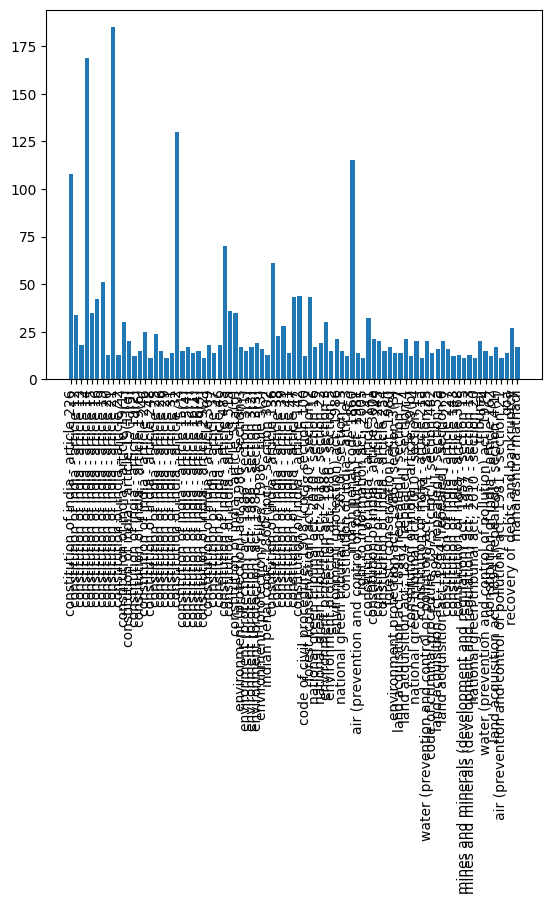

In [63]:

# plot the graph of acts which have frequency more than 10
# get the list of acts which have frequency more than 10
act_list = []
act_freq = []
for act, count in act_counts.items():
    if count > 10:
        act_list.append(act)
        act_freq.append(count)

# plot the graph
import matplotlib.pyplot as plt
plt.bar(act_list, act_freq)
plt.xticks(rotation=90)
plt.show()



In [64]:
# show 10 most frequent acts
import operator
sorted_act_counts = sorted(act_counts.items(), key=operator.itemgetter(1), reverse=True)
# print(sorted_act_counts[:10])

print("----------------------------------")
print("Top 10 Acts")
print("----------------------------------")
for act, count in sorted_act_counts[:10]:
    print(f'{act}: {count}')


----------------------------------
Top 10 Acts
----------------------------------
constitution of india - article 21: 185
constitution of india - article 14: 169
constitution of india - article 32: 130
indian penal code 1860: 115
constitution of india - article 226: 108
constitution of india - article 48a: 70
constitution of india - article 136: 61
constitution of india - article 19: 51
constitution of india - article 142: 44
constitution of india - article 47: 43


In [65]:

# show 10 least frequent acts
print(sorted_act_counts[-10:])


[('forest (conservation) act, 1980 - section 28', 1), ('forest (conservation) act, 1980 - section 44', 1), ('indian telegraph rules', 1), ('karnataka industrial areas development act, 1966 - section 2(7a)', 1), ('karnataka land revenue rules, 1965', 1), ('karnataka stamp act, 1957 - section 9', 1), ('karnataka town and country planning act, 1961 - section 4a(1)', 1), ('karnataka town and country planning act, 1961 - section 15(2)', 1), ('prevention of corruption act', 1), ('urban land (ceiling and regulation) act, 1976 - section 20', 1)]


In [66]:
# top 50 acts
print("----------------------------------")
print("Top 50 Acts")
print("----------------------------------")
for act, count in sorted_act_counts[:50]:
    print(f'{act}: {count}')

----------------------------------
Top 50 Acts
----------------------------------
constitution of india - article 21: 185
constitution of india - article 14: 169
constitution of india - article 32: 130
indian penal code 1860: 115
constitution of india - article 226: 108
constitution of india - article 48a: 70
constitution of india - article 136: 61
constitution of india - article 19: 51
constitution of india - article 142: 44
constitution of india - article 47: 43
forest (conservation) act, 1980 - section 2: 43
constitution of india - article 16: 42
constitution of india - article 51a: 36
constitution of india - article 15: 35
constitution of india - article 51a(g): 35
constitution of india - article 12: 34
constitution of india - article 141: 32
constitution of india - article 19(1): 30
environment protection act, 1986 - section 3: 30
constitution of india - article 39: 28
recovery of debts and bankruptcy: 27
constitution of india - article 246: 25
constitution of india - article 25: 

In [67]:
#if the act "constitution of india - article 21" is there in the list, then take the judgement and put it in a separate file
# if 'constitution of india - article 21' in act_counts:



df

,Unnamed: 0,Appellant,Respondent,Counsel for Appellant,Counsel for Respondent,Judgement,Manu_ID,Court,Case_No,Date,Hon'ble Judges/Coram,Subject,Acts/Rules/Orders,Case Note,Disposition,Cases Referred,discussed,Case Category,relied on
0,0,['In Re: Contagion of COVID 19 Virus in Childr...,[],"['By Courts Motion', 'AOR:']",[],1. This petition has been listed suo moto bec...,MANU/SC/0358/2020,IN THE SUPREME COURT OF INDIA,Suo Moto Writ Petition (Civil) No. 4 of 2020,03.04.2020,"L. Nageswara Rao and Deepak Gupta, JJ.",Civil,Juvenile Justice (Care And Protection Of Child...,Law of Medicine - Child care institutions - Di...,Disposed of,NaN,NaN,NaN,NaN
1,1,['Geomin Minerals and Marketing (P) Ltd. and O...,['State of Orissa and Ors.:'],[],[],"S.J. Mukhopadhaya, J.1. Leave granted.2. Thes...",MANU/SC/0508/2013,IN THE SUPREME COURT OF INDIA,Civil Appeal No. 4561 and 4563 of 2013 (Arisin...,10.05.2013,"R.M. Lodha and S.J. Mukhopadhaya, JJ.",Mines and Minerals,"Companies Act, 1956 - Section 3; Constitution ...",Mines and Minerals - Preferential right for gr...,Appeal Allowed,Bengal Immunity Co. Ltd. v. State of Bihar and...,2.0,"MINES, MINERALS AND MINING LEASES",NaN
2,2,['Maneka Gandhi:'],['Union of India (UOI) and Ors.:'],"['Madan Bhatia and D. Goburdhan', 'Advs:']","['S.V. Gupte', 'Attorney General', 'Soli J. So...","Authored By : M. Hameedullah Beg, Y.V. Chandr...",MANU/SC/0133/1978,IN THE SUPREME COURT OF INDIA,Writ Petition No. 231 of 1977,25.01.1978,"M. Hameedullah Beg, C.J., N.L. Untwalia, P.N. ...",Civil,"Constitution Of India - Article 10, Constituti...",(i) Constitution - validity of provision - Art...,Disposed of,"Satwant Singh Sawhney vs. D. Ramarathnam, Assi...",85.0,NaN,NaN
3,3,['State of Kerala and Ors.:'],['N.M. Thomas and Ors.:'],"['M.M. Abdul Khader', 'Adv. General', 'Kerala ...","['T.S. Krishnamurthy Iyer', 'P.K. Pillai', 'N....",1. This appeal is by certificate from the jud...,MANU/SC/0479/1975,IN THE SUPREME COURT OF INDIA,Civil Appeal No. 1160 of 1974,19.09.1975,"A.N. Ray, C.J., A.C. Gupta, H.R. Khanna, K.K. ...",Service,"Constitution Of India - Article 10, Constituti...",Constitution - Validity of Rule - Article 16 o...,Appeal Allowed,The State of Gujarat and Anr. vs. Shri Ambica ...,23.0,NaN,NaN
4,4,['Tata Housing Development Company Ltd.:'],['Aalok Jagga and Ors.:'],"['Shyam Divan', 'Sr. Adv.', 'Manu Nair', 'Neel...","['A.N.S. Nadkarni', 'ASG', 'Ashok Kumar Srivas...","Arun Mishra, J.1. The Appellant has questione...",MANU/SC/1508/2019,IN THE SUPREME COURT OF INDIA,Civil Appeal Nos. 8398-8399 of 2019 (Arising o...,05.11.2019,"Arun Mishra, M.R. Shah and B.R. Gavai, JJ.",Constitution,"Constitution of India - Article 14, Constituti...",Environment - Construction of project - Permis...,Appeal Dismissed,Animal and Environment Legal Defence Fund v. U...,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,621,['Afjal Imam:'],['State of Bihar and Ors.:'],"['S.B.K. Mangalam', 'Rajesh Anand', 'Ashutosh ...","['Santosh Mishra', 'Gopal Singh', 'Manish Kuma...","H.L. Gokhale, J.1. Leave granted.By the order...",MANU/SC/0433/2011,IN THE SUPREME COURT OF INDIA,Civil Appeal No. 2843 of 2011 (Arising out of ...,19.04.2011,"J.M. Panchal and H.L. Gokhale, JJ.",Decentralization,"Code of Civil Procedure, 1908 (CPC) - Section ...",Constitution - Validity of Section 27 of the B...,Appeal Allowed,Jagdish Singh v. State of Bihar MANU/BH/1051/2...,16.0,NaN,NaN
622,622,['All India Power Engineer Federation and Ors.:'],['Sasan Power Ltd. and Ors.:'],[],[],"Rohinton Fali Nariman, J.1. These appeals hav...",MANU/SC/1567/2016,IN THE SUPREME COURT OF INDIA,"Civil Appeal Nos. 5881-5882, 5239-5240, 5342-5...",08.12.2016,"Kurian Joseph and Rohinton Fali Nariman, JJ.",Electricity,"Electricity Act, 2003 - Section 28, Electricit...",Whether Appellate Tribunal was incorrect in ac...,Appeal Allowed,Juggilal Kamlapat v. N.V. Internationale Credi...,5.0,"COMPANY LAW, MRTP AND ALLIED MATTERS - MATTERS...",1.0
623,

In [73]:
import re

# constitution of india - article 21 in acts/rules/orders, lowercase it first
df['Acts/Rules/Orders'] = df['Acts/Rules/Orders'].str.lower()
filtered = df[df['Acts/Rules/Orders'].str.contains('constitution of india - article 21', na=False)]
filtered14 = df[df['Acts/Rules/Orders'].str.contains('constitution of india - article 14', na=False)]
filtered32 = df[df['Acts/Rules/Orders'].str.contains('constitution of india - article 32', na=False)]
# replace Judgment from beginning not middle
# filtered['Judgement'] = filtered['Judgement'].str.replace('JUDGMENT', ' ')
# same for ORDER
# filtered['Judgement'] = filtered['Judgement'].str.replace('ORDER', ' ')



filtered

,Unnamed: 0,Appellant,Respondent,Counsel for Appellant,Counsel for Respondent,Judgement,Manu_ID,Court,Case_No,Date,Hon'ble Judges/Coram,Subject,Acts/Rules/Orders,Case Note,Disposition,Cases Referred,discussed,Case Category,relied on
2,2,['Maneka Gandhi:'],['Union of India (UOI) and Ors.:'],"['Madan Bhatia and D. Goburdhan', 'Advs:']","['S.V. Gupte', 'Attorney General', 'Soli J. So...","Authored By : M. Hameedullah Beg, Y.V. Chandr...",MANU/SC/0133/1978,IN THE SUPREME COURT OF INDIA,Writ Petition No. 231 of 1977,25.01.1978,"M. Hameedullah Beg, C.J., N.L. Untwalia, P.N. ...",Civil,"constitution of india - article 10, constituti...",(i) Constitution - validity of provision - Art...,Disposed of,"Satwant Singh Sawhney vs. D. Ramarathnam, Assi...",85.0,NaN,NaN
4,4,['Tata Housing Development Company Ltd.:'],['Aalok Jagga and Ors.:'],"['Shyam Divan', 'Sr. Adv.', 'Manu Nair', 'Neel...","['A.N.S. Nadkarni', 'ASG', 'Ashok Kumar Srivas...","Arun Mishra, J.1. The Appellant has questione...",MANU/SC/1508/2019,IN THE SUPREME COURT OF INDIA,Civil Appeal Nos. 8398-8399 of 2019 (Arising o...,05.11.2019,"Arun Mishra, M.R. Shah and B.R. Gavai, JJ.",Constitution,"constitution of india - article 14, constituti...",Environment - Construction of project - Permis...,Appeal Dismissed,Animal and Environment Legal Defence Fund v. U...,8.0,NaN,NaN
9,9,['Narmada Bachao Andolan:'],['State of Madhya Pradesh:'],[],[],"B.S. Chauhan, J.1. This appeal has been prefe...",MANU/SC/0853/2011,IN THE SUPREME COURT OF INDIA,Civil Appeal No. 3726 of 2011,26.07.2011,"J.M. Panchal, Deepak Verma and B.S. Chauhan, JJ.",Land Acquisition,"constitution of india - article 154(1), consti...",Constitution - Delegation of power by State Co...,Appeal Dismissed,Narmada Bachao Andolan v. State of M.P. MANU/S...,8.0,LETTER PETITION AND PIL MATTER - SLPs FILED AG...,NaN
13,13,['Tirupur Dyeing Factory Owners Association:'],['Noyyal River Ayacutdars Protection Associati...,"['Soli J. Sorabjee', 'Mukul Rohatgi', 'Jaideep...","['Rajeev Dhawan', 'Sr. Adv.', 'Dayan Krishnan'...","B.S. Chauhan, J.1. Leave granted.2. These app...",MANU/SC/1708/2009,IN THE SUPREME COURT OF INDIA,Civil Appeal No. 6776 of 2009 (Arising out of ...,06.10.2009,"K.G. Balakrishnan, C.J. and B.S. Chauhan, J.",Environment,"constitution of india - article 21, constituti...",Environment - Discharge of effluents into rive...,Disposed of,Indian Council for Enviro-Legal Action v. Unio...,3.0,LETTER PETITION AND PIL MATTER - WATER POLLUTI...,NaN
15,15,['Research Foundation for Science Technology a...,['Union of India (UOI) and Ors.:'],[],[],"Y.K. Sabharwal, J.1. Considering the alarming...",MANU/SC/0013/2005,IN THE SUPREME COURT OF INDIA,Writ Petition (C) No. 657 of 1995 with SLP (C)...,05.01.2005,"Y.K. Sabharwal and S.H. Kapadia, JJ.",Environment,"constitution of india - article 21, constituti...",Held: Confiscation - Waste and Scrap--Consignm...,Disposed of,Deepak Nitrite Ltd. v. State of Gujarat and Or...,1.0,LETTER PETITION AND PIL MATTER - WATER POLLUTI...,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,['T.N. Godavarman Thirumulpad:'],['Union of India (UOI) and Ors.:'],[],[],"S.S. Nijjar, J.1. This order will dispose of ...",MANU/SC/0195/2014,IN THE SUPREME COURT OF INDIA,"I.A. Nos. 2143 with 2283, 3088, 3461, 3479, 36...",12.03.2014,"A.K. Patnaik, S.S. Nijjar and F.M. Ibrahim Kal...",Environment,"indian forest act, 1927; forest (conservation)...",Environment - Tropical forest - Destroying of ...,Disposed of,M.C. Mehta v. Kamal Nath and Ors. MANU/SC/1007...,1.0,NaN,NaN
611,611,['P. Rathinam and Ors.:'],['Union of India (UOI) and Ors.:'],['R. Venkataramani Advocate (NP) Ranjan Dwived...,"['V.C. Mahajan', 'Tara Chandra Sharma', 'P. Pa...","B.L. Hansaria, J.1. Gandhiji once observed:De...",MANU/SC/0433/1994,IN THE SUPREME COURT OF INDIA,Writ Petn. (Crl.) Nos. 409 of 1986 and 419 of ...,26.04.1994,"R.M. Sahai and B.L. Hansaria, JJ.",Constitution,"constitution of india - article 14

In [83]:
text21 = []
for index, row in filtered.iterrows():
    text21.append(row['Judgement'])

with open('constitution_of_india_article_21.txt', 'w') as f:
    f.write('\n\n'.join(text21))

text14 = []
for index, row in filtered14.iterrows():
    text14.append(row['Judgement'])

with open('constitution_of_india_article_14.txt', 'w') as f:
    f.write('\n\n'.join(text14))

text32 = []
for index, row in filtered32.iterrows():
    text32.append(row['Judgement'])

with open('constitution_of_india_article_32.txt', 'w') as f:
    f.write('\n\n'.join(text32))


In [1]:
import nltk
nltk.download('stopwords')

import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline



[nltk_data] Downloading package stopwords to /home/srijan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Read data from the constitution_of_india_article_14.txt

with open('constitution_of_india_article_14.txt', 'r') as f:
    data = f.read()

# Convert to list of words by splitting based on \n
data = data.split('\n')

# write into a temp file
# with open('temp.txt', 'w') as f:
#     f.write(data[0])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations

data_words = list(sent_to_words(data))

# write into a temp file

with open('temp.txt', 'w') as f:
    f.write(str(data_words[0]))


[['authored', 'by', 'hameedullah', 'beg', 'chandrachud', 'bhagwati', 'krishna', 'iyer', 'kailasamm', 'hameedullah', 'beg', 'the', 'case', 'before', 'us', 'involves', 'questions', 'relating', 'to', 'basic', 'human', 'rights', 'on', 'such', 'questions', 'believe', 'that', 'multiplicity', 'of', 'views', 'giving', 'the', 'approach', 'of', 'each', 'member', 'of', 'this', 'court', 'is', 'not', 'disadvantage', 'if', 'it', 'clarifies', 'our', 'not', 'infrequently', 'differing', 'approaches', 'it', 'should', 'enable', 'all', 'interested', 'to', 'appreciate', 'better', 'the', 'significance', 'of', 'our', 'constitution', 'as', 'am', 'in', 'general', 'agreement', 'with', 'my', 'learned', 'brethren', 'bhagwati', 'and', 'krishna', 'iyer', 'will', 'endeavour', 'to', 'confine', 'my', 'observations', 'to', 'an', 'indication', 'of', 'my', 'own', 'approach', 'on', 'some', 'matters', 'for', 'consideration', 'now', 'before', 'us', 'this', 'seems', 'to', 'me', 'to', 'be', 'particularly', 'necessary', 'as', 